# Astronomy 8824 - Numerical and Statistical Methods in Astrophysics

## Statistical Methods Topic I. High Level Backround

These notes are for the course Astronomy 8824: Numerical and Statistical Methods in Astrophysics. It is based on notes from David Weinberg with modifications and additions by Paul Martini.
David's original notes are available from his website: http://www.astronomy.ohio-state.edu/~dhw/A8824/index.html

#### Background reading: 
- Statistics, Data Mining, and Machine Learning in Astronomy, Chapter 3 (see David's [Reader's Guide](http://www.astronomy.ohio-state.edu/~dhw/A8824/ivezic_guide.pdf))

In [1]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize

# matplotlib settings 
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

LaTex macros hidden here -- 
$\newcommand{\expect}[1]{{\left\langle #1 \right\rangle}}$
$\newcommand{\intinf}{\int_{-\infty}^{\infty}}$
$\newcommand{\xbar}{\overline{x}}$

### Statistical Tasks in Astrophysics

Four common statistical tasks:

1. Parameter estimation

2. Comparison of hypotheses

3. Absolute evaluation of a hypothesis 

4. Forecasting of errors

Another task, slightly less common: Prediction of values from a model fit to some set of data, when the parameters of the model are uncertain.

### Simple Example: Data points with error bars

**Parameter estimation:** What are slope and amplitude of a power-law fit?
What are the uncertainties in the parameters?

When you fit a power-law model to data, you _assume_ that power-law description is valid.


**Hypothesis comparison:** Is a double power-law better than a single power-law?

Hypothesis comparisons are trickier when the number of parameters is different, since one must decide whether the fit to the data is _sufficiently_ better given the extra freedom in the more complex model.

A simpler comparison would be single power-law vs. two constant plateaus with a break at a specified location, both with two parameters.


**Absolute evaluation:** Are the data consistent with a power-law?

Absolute assessments of this sort are generally much more problematic than hypothesis comparisons.


**Forecasting of errors:** How many more measurements, or what reduction of uncertainties in the measurements, would allow single and double power-law models to be clearly distinguished?

Need to specify goals, and assumptions about the data. This is a common need for observing proposals, grant proposals, satellite proposals etc. 

### Complicated example: CMB power spectrum with errors.


**Parameter estimation:** In a "vanilla" $\Lambda$CDM model, what are the best values of $\Omega_m$, $\Omega_b$, $h$, $n$, and $\tau$?

One often wants to combine CMB with other data to break degeneracies and get better constraints.


**Hypothesis comparisons:** Are data consistent with $\Omega_m=1$? Do they favor inclusion of space curvature, or gravity waves?

This typically involves comparison of models with different numbers of parameters.


**Absolute assessment:** Can the restricted, "vanilla" $\Lambda$CDM model be rejected?


**Forecasting:** What constraints or tests could be achieved with a new experiment?

This kind of analysis played a key role in the design and approval of WMAP, Planck, DESI, and other major cosmological surveys.  

There is presently a lot of work along these lines for future cosmological surveys and CMB experiments.

### PDF, Mean, and Variance

If $p(x)$ is the **probability distribution function** (pdf) of a **random variable** $x$, then $p(x) dx$ is the probability that $x$ lies in a small interval $dx$.

The **expectation value** of a random variable $x$ is $\expect{x} = \intinf xp(x)dx = \mu$. The expectation value of $x$ is equal to the (arithmetic) mean. It is sometimes also written $\mu = E(x)$. 

The expectation value of a function $y(x)$ is $\expect{y(x)} = \intinf y(x) p(x) dx.$ 


The variance is $V(x)=\expect{(x-\mu)^2} \equiv \sigma^2$.

The standard deviation is $\sigma = \sqrt{\sigma^2}$.  This is also called the dispersion.

#### Useful variance relation

$$
V(x)=\expect{(x-\mu)^2} = \int (x - \mu)^2 p(x) dx
$$

$$
= \int (x^2 - 2\mu x + \mu^2) p(x) dx = \int x^2 p(x) dx - 2 \mu \int x p(x) dx + \mu^2 \int p(x) dx
$$

$$
= \expect{x^2} - 2 \expect{x}^2 + \expect{x}^2 
$$

This reduces to the useful result that $V(x) = \expect{x^2} - \expect{x}^2$.


#### Sum of the variances

For _independent_ random variables $y_1$, $y_2$, ... $y_N$ (drawn from the same distribution or different distributions), the variance of the sum is the sum of the variances:
$$
V(y_1+y_2+...y_N) = \sum_{i=1,N} V(y_i).
$$
This can be proved by induction.

If random variables $x$ and $y$ are independent, then $p(x,y) = p(x)p(y)$ and
$$
{\rm Cov}(x,y) \equiv \expect{(x-\mu_x)(y-\mu_y)}=0.
$$
The second statement can be proved from the first.

#### Demonstration

$$
Var(y_1 + y_2) = \expect{(y_1 + y_2)^2} - \expect{y_1+y_2}^2
$$
$$
= \expect{y_1^2 + 2 y_1 y_2 + y_2^2} - \expect{y_1+y_2}^2
$$
Then looking at just the first term:

$$
\expect{y_1^2 + 2 y_1 y_2 + y_2^2} = \int y_1^2 p(y_1) p(y_2) dy_1 dy_2 + 2 \int y_1 y_2 p(y_1) p(y_2) dy_1 dy_2 + \int y_2^2 p(y_1) p(y_2) dy_1 dy_2\int 
$$
Note that the integral \int p(y_1) dy_1 = 1 by definition, so we can simplify the above to:

$$
= \expect{y_1^2} + 2 \expect{y_1 y_2} + \expect{y_2^2}
$$

Now looking at the second term:
$$
\expect{y_1+y_2}^2 = \left[ \int (y_1 + y_2) p(y_1) p(y_2) dy_1 dy_2 \right]^2
$$
$$
= \expect{y_1}^2 + 2 \expect{y_1} \expect{y_2} + \expect{y_2}^2
$$

Now combining these two:
$$
Var(y_1 + y_2) = \expect{y_1^2} + 2 \expect{y_1 y_2} + \expect{y_2^2} - \expect{y_1}^2 - 2 \expect{y_1} \expect{y_2} - \expect{y_2}^2
$$
$$
= \expect{y_1^2} + \expect{y_2^2} - \expect{y_1}^2 - \expect{y_2}^2 
$$
Which is equivalent to:
$$
Var(y_1 + y_2) = Var(y_1) + Var(y_2)
$$

#### Linearity of Expectation

This is often invoked more generally as a statement about the _Linearity of Expectation_. 

$$
\expect{x + y} = \int (x + y) p(x) p(y) dx dy = \int x p(x) p(y) dx dy + \int y p(x) p(y) dx dy = \expect{x} + \expect{y} 
$$

### Covariance

Covariance is a measure of the _joint probability_ of 2 random variables. It describes how they change together. 

It is commonly written as:

$$
Cov(y_1, y_2) = \expect{y_1 - \expect{y_1} } \expect{y_2 - \expect{y_2} }
$$
or 
$$ 
= \expect{y_1 - \mu_1} \expect{y_2 - \mu_2}
$$

This can also be written as:
$$
Cov(y_1, y_2) = \expect{y_1 y_2 - \expect{y_1} y_2 - y_1 \expect{y_2} + \expect{y_1} \expect{y_2} }
$$
using the linearity of expectation
$$
= \expect{y_1 y_2} - \expect{y_1}\expect{y_2} - \expect{y_1}\expect{y_2} + \expect{y_1} \expect{y_2}
$$
or 
$$
Cov(y_1, y_2) = \expect{y_1 y_2} - \expect{y_1} \expect{y_2}
$$
Note that if $y_1$ and $y_2$ are independent variables, 
$$
\expect{y_1 y_2} = \int y_1 y_2 p(y_1) p(y_2) dy_1 dy_2 = \int y_1 p(y_1) dy_1 \int y_2 p(y_2) dy_2 = \expect{y_1} \expect{y_2}
$$
and therefore $Cov(y_1, y_2) = 0$. 

Text(-4, 4, '$\\sigma_{xy} = 0.5$')

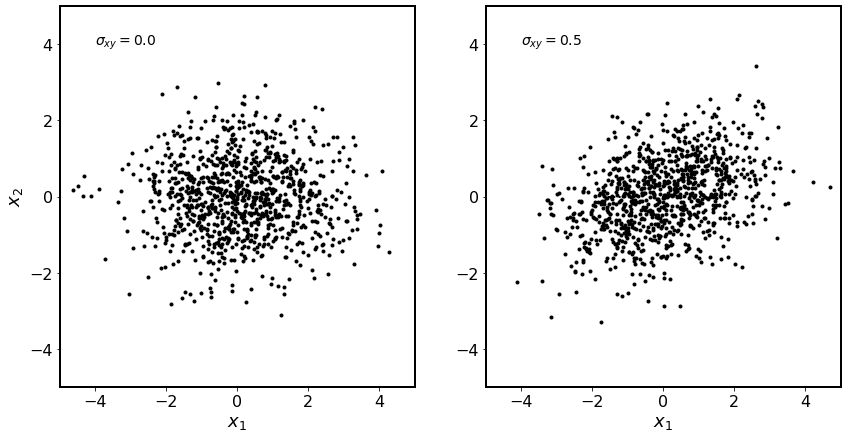

In [2]:
### Covariance Example

np.random.seed(1216)

sig_x = 2
sig_y = 1
sig_xy = 0
mean = np.array([0, 0], dtype=float)
cov = np.array( [[sig_x, sig_xy], [sig_xy, sig_y]], dtype=float)
x = np.random.multivariate_normal(mean, cov, size=1000)

fig, axarr = plt.subplots(1, 2, figsize=(14,7))

axarr[0].plot(x.T[0], x.T[1], 'k.')
axarr[0].set_xlabel(r"$x_1$")
axarr[0].set_ylabel(r"$x_2$")
axarr[0].set_xlim(-5, 5)
axarr[0].set_ylim(-5, 5)
axarr[0].text(-4, 4, r"$\sigma_{xy} = 0.0$")

sig_x = 2
sig_y = 1
sig_xy = 0.5
mean = np.array([0, 0], dtype=float)
cov = np.array( [[sig_x, sig_xy], [sig_xy, sig_y]], dtype=float)
x = np.random.multivariate_normal(mean, cov, size=1000)

axarr[1].plot(x.T[0], x.T[1], 'k.')
axarr[1].set_xlim(-5, 5)
axarr[1].set_ylim(-5, 5)
axarr[1].plot( [x[0], x[-1]], [0, 0], 'k:')
axarr[1].set_xlabel("$x_1$")
axarr[1].text(-4, 4, r"$\sigma_{xy} = 0.5$")

### Estimators

An estimator is a mathematical function of data that estimates a quantity of interest. An important distinction to keep in mind for data is the distinction between "population statistics" (the underlying distribution) and "sample statistics" (the measurements of the population). 

Ideally one wants an estimator to be

- _unbiased_ -- even with a small amount of data, the expectation value of estimator is equal to the quantity being estimated

- _efficient_ -- makes good use of the data, giving a low variance about the true value of the quantity

- _robust_ -- isn't easily thrown off by data that violate your assumptions about the pdf, e.g., by non-Gaussian tails of the error distribution

- _consistent_ -- in the limit of lots of data, it converges to the true value

These four desiderata sometimes pull in different directions.

Suppose we have $N$ independent data points (the sample) drawn from an unknown distribution $p(x)$ (the population).

#### The mean estimator

The obvious estimator for the mean of the distribution is the sample mean, $\xbar={1\over N}\sum x_i$. The expectation value for the sample mean is: 

$$
\expect{\xbar} = \expect{\frac{1}{N} \sum x_i} = 
\frac{1}{N} \sum \expect{x_i} = \mu.
$$
Thus, the sample mean is an _unbiased_ estimator of $\mu$.

#### Variance of the mean estimator

The variance of this estimator is 
$$
\expect{(\xbar-\mu)^2} = V\left(\frac{1}{N} \sum x_i\right) = 
{1 \over N^2} V\left(\sum x_i\right) = 
{1 \over N^2} \sum V(x_i) =
{1 \over N^2} \times N\sigma^2 = {\sigma^2 \over N},
$$
where $\sigma^2$ is the variance of the underlying distribution.

We have used the fact that $\expect{\xbar}=\mu$, and we have used the assumed independence of the $x_i$ to go from the variance of a sum to a sum of variances.

#### Other mean estimators 

An alternative estimator for the mean is the value of the third sample member, $x_3$.

Since $\expect{x_3} = \mu$, this estimator is unbiased, but $V(x_3) = \sigma^2$, so this estimate is noisier than the sample mean by $\sqrt{N}$.

A more reasonable estimator is the sample _median_, though this is a biased estimator if $p(x)$ is asymmetric about the mean.

If $p(x)$ is Gaussian, then the variance of the sample median is ${\pi \over 2}{\sigma^2 \over N}$, so it is a less _efficient_ estimator than the sample mean.

However, if $p(x)$ has long non-Gaussian tails, then the median may be a much _more_ efficient estimator of the true mean(i.e., giving a more accurate answer for a fixed number of data points), since it is not sensitive to rare large or small values.

Estimators that are insensitive to the extremes of a distribution are often called _robust_ estimators.

#### Variance estimator

The obvious estimator for the variance of the distribution is the sample variance
$$
s^2 = \frac{1}{N} \sum (x_i-\xbar)^2 = \frac{1}{N} \sum x_i^2 - \xbar^2.
$$
However, a short derivation shows that the sample variance is biased low: 
$$
\expect{s^2} = {N-1 \over N}\sigma^2,
$$
This is because we had to use the sample mean rather than the true mean, which on average drives down the variance.

An unbiased estimator is therefore
$$
\hat{\sigma}^2 = {1\over N-1} \sum (x_i-\xbar)^2.
$$

If you compute the mean of a sample, or of data values in a bin, the estimated _standard deviation of the mean_ is
$$
\hat{\sigma}_\mu = \left[{1 \over N(N-1)}\sum (x_i-\xbar)^2\right]^{1/2}.
$$
Note that this is smaller by $N^{-1/2}$ than the estimate of the dispersion within the bin.  You should always be clear which quantity (dispersion or standard deviation of the mean) you are plotting.

If $p(x)$ is Gaussian, then the distribution of $\xbar/\sigma$ is a Gaussian of width $N^{-1/2}$.  However, the distribution of $\xbar/\hat{\sigma}$ is broader (a Student's $t$ distribution).

### Snap-judging Error Bars

What is wrong with this plot?

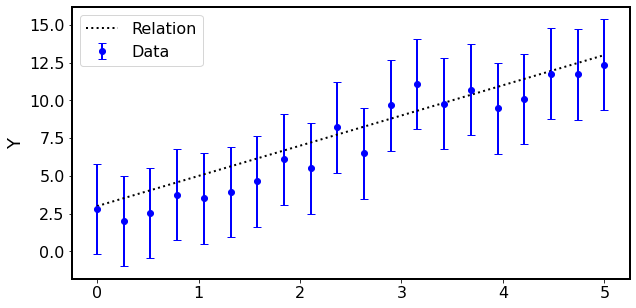

In [3]:
Npts = 20
x = np.linspace(0, 5, Npts)
m = 2
b = 3
y = m*x + b
sig_y = np.random.normal(0, 1, Npts)
fx = y + sig_y

err_y = 3*np.ones(len(x))  # + 2.*np.ones(len(x))
plt.figure(figsize=(10,5))
plt.errorbar(x, fx, yerr=err_y, fmt='bo', capsize=4, label="Data")
plt.plot(x, y, 'k:', label="Relation")
plt.ylabel("Y")
plt.legend(loc='upper left')

### Bayesian vs. Frequentist Statistics

Suppose we have measured the mean mass of a sample of G stars, by some method, and say: at the 68\% confidence level the mean mass of G stars is $a \pm b$.  What does this statement mean?


Bayesian answer: There is some true mean mass $\alpha$ of G stars, and there is a 68\% probability that $a-b \leq \alpha \leq a+b$.

More pedantically: The hypothesis that the true mean mass $\alpha$ of G stars lies in the range $a-b$ to $a+b$ has a 68\% probability of being true.

The **probability of the hypothesis is a real-numbered expression of the degree of belief we should have in the hypothesis**, and it obeys the axioms of probability theory.


In "classical" or "frequentist" statistics, a probability is a statement about the frequency of outcomes in many repeated trials. With this restricted definition, **one can't refer to the probability
of a hypothesis -- it is either true or false**.  One can refer to the probability of data if a hypothesis is true, where probability means the fraction of time the data would have come out the way it did in many repeated trials.  

Frequentist answer: The statement means something like: if $\alpha = a$, we would have expected to obtain a sample mean in the range $a\pm b$ 68\% of the time.

##### This is the fundamental conceptual difference between Bayesian and frequentist statistics.


**Bayesian:** Evaluate the probability of a hypothesis in light of data (and prior information).  Parameter values or probability of truth of a hypothesis are random variables, _data are not_ (though they are drawn from a pdf).

**Frequentist:** Evaluate the probability of obtaining the data --- more precisely, the fraction of times a given _statistic_ (such as the sample mean) applied to the data would come out the way it did in many repeated trials --- given the hypothesis, or parameter values. A probability is a statement about the frequency of outcomes in many repeated trials. Data are random variables, parameter values or truth of hypotheses are not.

#### Summary of the differences

| Bayesian | Frequentist | 
| :-: | :-: | 
| Evaluate the probability of a hypothesis, given the data | Evaluate the probability of obtaining the data | 
| Parameters and probability of truth are random variables | Data are random variables | 
| Data are not random variables | Parameters and probability of truth are not random variables | 
| Need to specify alternatives to evaluate hypotheses | Statistical tests implicitly account for alternatives | 

David's opinion: The Bayesian formulation corresponds better to the way scientists actually think about probability, hypotheses, and data.  It provides a better conceptual basis for figuring out what to do in a case where a
standard recipe does not neatly apply.   But frequentist methods sometimes seem easier to apply, and they clearly capture _some_ of our intuition about probability.

Bottom line: One should be a Bayesian in principle, but maybe not always
in practice.


### Probability Axioms and Bayes' Theorem

Probabilities are real numbers $0 \leq p \leq 1$ obeying the axioms
$$
p(A|C) + p(\overline{A}|C) = 1.
$$
$$
p(AB|C) = p(A|BC)P(B|C)
$$
$\overline{A}$ means "not $A$" 

$AB$ means "$A$ and $B$" and is thus equivalent to $BA$.  

From this equivalence we see that
$$
p(AB|C) = p(A|BC)p(B|C)=p(BA|C)=p(B|AC)p(A|C).
$$

From the 2nd and 4th entries above, we arrive at **Bayes' Theorem**
$$
p(A|BC) = p(A|C) {p(B|AC) \over p(B|C)}.
$$


### Bayesian Inference


In application to scientific inference, this theorem is usually written
$$ 
p(H|DI) = p(H|I) {p(D|HI) \over p(D|I)},
$$
where

$H$ = hypothesis, which might be a statement about a parameter value, e.g., the population mean lies in the range $x \rightarrow x+dx$.

$D$ = data

$I$ = background information, which may be minimally informative or highly
informative.  

$p(H|I)$ = **prior probability**, i.e., before data are considered

$p(D|HI)$ = **likelihood** of data given $H$ and $I$

$p(D|I)$ = **global likelihood**

$p(H|DI)$ = **posterior probability**, the probability of the hypothesis
after consideration of the data


Bayes' Theorem tells us how to update our estimate of the probability of a hypothesis in light of new data.

It can be applied sequentially, with the posterior probability from one experiment becoming the prior for the next, as more data become available.

Calculation of likelihood $P(D|HI)$ is sometimes straightforward, sometimes difficult.  The background information
$I$ may specify assumptions like a Gaussian error distribution, independence of data points.

Important aspect of Bayesian approach: only the actual data enter, not hypothetical data that could have been taken.

_All the evidence of the data is contained in the likelihood._


### Global Likelihood and Absolute Assessment

The global likelihood of the data, $P(D|I)$ is the sum (or integral) over "all" hypotheses.  This can be a slippery concept.

Often $P(D|I)$ doesn't matter: in comparing hypotheses or parameter values, it cancels out.

When needed, it can often be found by requiring that $p(H|DI)$ integrate (or sum) to one, as it must if it is a true probability.

The Bayesian approach forces specification of alternatives to evaluate hypotheses.

Frequentist assessment tends to do this implicitly via the choice of statistical test.

### Criticism of Bayesian approach

The incorporation of priors makes Bayesian methods seem subjective, and it is the main source of criticism of the Bayesian approach.

If the data are compelling and the prior is broad, then the prior doesn't have much effect on the posterior.  But if the data are weak, or the prior is narrow, then it can have a big effect.

Sometimes there are well defined ways of assigning an "uninformative" prior, but sometimes there is genuine ambiguity.

Bayesian methods sometimes seem like a lot of work to get to a straightforward answer.

In particular, we sometimes want to carry out an "absolute" hypothesis test without having to enumerate all alternative hypotheses.


### Criticism of frequentist approach

The frequentist approach doesn't correspond as well to scientific intuition.  We want to talk about the probability of hypotheses or parameter values.

The choice of which statistical test to apply is often arbitrary. There is not a clear way to go from the result of a test to an actual scientific inference about parameter values or validity of a hypothesis.

Bayesians argue (and I agree) that frequentist methods obtain the appearance of objectivity only by sweeping priors under the rug, making assumptions implicit rather than explicit.

Frequentist approach relies on hypothetical data as well as actual data obtained. Choice of hypothetical data sets is often ambiguous, e.g., in the "stopping" problem.

Sometimes we _do_ have good prior information.  It is straightforward to incorporate this in a Bayesian approach, while it is not in the frequentist approach.

Frequentist methods are poorly equipped to handle "nuisance parameters," which in the Bayesian approach are easily handled by marginalization.

For example, the marginal distribution of a parameter $x$ 
$$
p(x) = \int p(x|a,b,c) da\,db\,dc
$$
can only exist if $x$ is a random variable.